<a href="https://colab.research.google.com/github/JH-Y-324/first-repository/blob/master/Day09_Ch12(PCA%26Clustering)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 고객 데이터에서 숨겨진 패턴 찾기: PCA와 클러스터링

지난 시간, 우리는 통계분석의 다양한 방법들을 배웠습니다. 특히, 변수가 많은 고차원 데이터는 해석하기 어렵고, 분석 모델의 성능을 저하시키는 '차원의 저주' 문제가 발생할 수 있다는 점을 확인했습니다. 또한, 정답이 없는 데이터 속에서 숨겨진 구조나 그룹을 찾아내는 비지도 학습의 중요성도 배웠습니다.

오늘은 **주성분 분석(PCA)**을 이용해 복잡한 고객 데이터를 핵심 정보만 남기고 차원을 축소하고, **K-평균(K-Means) 군집분석**을 통해 고객들을 의미 있는 그룹으로 나누는 과정을 직접 코드로 구현합니다. 데이터의 숨겨진 인사이트를 발견하고, 이를 바탕으로 비즈니스 의사결정을 내리는 데이터 분석가의 핵심 역량을 체험하게 될 것입니다.

**🎯 프로젝트 목표:**

1.  **차원 축소의 이해**: '차원의 저주'가 무엇인지 이해하고, **주성분 분석(PCA)**을 통해 고차원 데이터를 시각화 및 분석이 용이한 저차원 데이터로 변환합니다.
2.  **주성분 해석**: PCA로 생성된 새로운 축(주성분)이 원래 데이터의 어떤 특성을 요약하는지 **주성분 부하량(Loadings)**을 통해 해석하는 능력을 기릅니다.
3.  **군집분석 적용**: 정답 없는 데이터에서 자연스러운 그룹을 찾아내는 **K-평균(K-Means) 군집분석**의 원리를 이해하고, 최적의 군집 개수(k)를 찾는 **엘보우 방법(Elbow Method)**을 적용합니다.
4.  **인사이트 도출 및 의사결정**: 차원 축소와 군집분석 결과를 종합하여 각 고객 그룹의 특징(페르소나)을 정의하고, 실제 비즈니스에 적용할 수 있는 마케팅 전략을 제안합니다.


## 🔬 실습 진행 안내

오늘 실습은 다음 순서로 진행됩니다. 각 단계의 목표를 명확히 인지하고 참여해 주세요.

1.  **개인 학습 (Individual Work):**

    - 먼저 **문제 1부터 4까지 모든 문제를 개인적으로** 풀어봅니다. 코드의 빈칸을 채우고, 각 문제의 핵심 개념과 '생각해 볼 문제'에 대한 자신의 답을 정리합니다.
    - 문제들이 서로 연결되어 있으므로(예: 문제 1의 결과는 문제 3에서 사용), 반드시 순서대로 모든 문제를 풀어야 합니다.

2.  **팀별 심화 및 발표 준비 (Team Deep-dive & Preparation):**

    - 각 팀은 **지정된 문제 하나**를 맡아 해당 문제의 '전문가'가 됩니다.
    - 개인적으로 풀었던 내용을 바탕으로, 팀원들과 함께 맡은 문제의 핵심 개념, 소스 코드, 생각해 볼 문제에 대한 답을 더 깊이 있게 토론하고 정리합니다.
    - 각 문제의 마지막에 있는 **'[발표 과제]'** 가이드를 참고하여 발표를 준비합니다.

3.  **팀별 발표 (Team Presentation):**
    - 각 팀은 맡은 문제에 대해 다른 모든 학생들을 가르쳐준다는 생각으로 발표를 진행합니다.
    - 문제의 배경, 핵심 개념, 코드 실행 과정, 결과 해석, 그리고 '생각해 볼 문제'에 대한 팀의 결론을 명확하게 전달해야 합니다.


## 📖 시작하기 전: 핵심 용어 사전

오늘 실습에서 계속 마주칠 핵심 용어들입니다. '이런 게 있구나' 정도로 가볍게 읽고 넘어가세요. 실습을 진행하며 각 용어의 의미가 더 명확해질 것입니다.

- **차원(Dimension):** 데이터가 가진 변수(피처)의 개수. (예: 고객 데이터에 '나이', '소득', '방문 빈도'가 있다면 3차원 데이터)
- **차원의 저주(Curse of Dimensionality):** 차원이 증가할수록 데이터 분석 및 모델링에 필요한 데이터 양이 기하급수적으로 증가하고, 데이터 간의 거리 측정이 어려워지는 현상.
- **주성분 분석(PCA):** 여러 변수 간에 존재하는 상관관계를 이용해, 데이터의 분산(정보)을 가장 잘 설명하는 새로운 축(주성분)들을 찾아 기존 데이터를 요약/축소하는 기법.
- **주성분(Principal Component):** PCA를 통해 생성된 새로운 변수. 첫 번째 주성분(PC1)이 데이터의 분산을 가장 많이 설명하며, 각 주성분은 서로 직교(독립)합니다.
- **기여율(Explained Variance Ratio):** 각 주성분이 전체 데이터 분산의 몇 %를 설명하는지를 나타내는 지표.
- **군집분석(Clustering):** 데이터의 유사성을 기반으로 전체 데이터를 몇 개의 그룹(군집)으로 나누는 비지도 학습 방법.
- **K-평균(K-Means):** 분석가가 지정한 k개의 중심점(centroid)을 기준으로, 각 데이터 포인트를 가장 가까운 중심점에 할당하는 과정을 반복하여 군집을 형성하는 알고리즘.
- **엘보우 방법(Elbow Method):** K-평균 군집분석에서 군집의 개수(k)를 늘려가면서, 각 군집 내 데이터들의 응집도(inertia) 변화를 그래프로 그려 최적의 k를 찾는 방법.


## 사전 준비: 라이브러리 및 데이터 로드

오늘은 데이터 분석을 위한 `pandas`, `numpy`, 시각화를 위한 `matplotlib`, `seaborn`, 그리고 머신러닝을 위한 `scikit-learn` 라이브러리를 사용합니다.


In [2]:
# 필요 라이브러리 설치
# !pip install scikit-learn seaborn

# 코랩에서 한글 폰트 사용을 위한 설정 (필요 시 주석 해제 후 실행)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 위 코드 실행 후 상단 메뉴에서 [런타임] > [런타임 다시 시작]을 눌러주세요.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 1 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,201 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 117528 files and direc

In [1]:
# 런타임 다시 시작 후, 이 셀을 실행하여 라이브러리와 폰트를 로드합니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 한글 폰트 설정 (Mac 사용자는 'AppleGothic', Windows 사용자는 'Malgun Gothic' 등)
plt.rc('font', family='NanumGothic')
# plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 실습용 데이터 생성
np.random.seed(42)
data = pd.DataFrame({
    # 평균 5000, 표준편차 1500, 고객 200명, 정수형으로 변환
    # 연간소득이 평균 5000 정도인 고객 200명
    '연간소득': np.random.normal(5000, 1500, 200).astype(int),
    # 1 ~ 100 사이. 고객 200명. 소비 성향 점수(높을수록 많이 씀)
    '소비점수': np.random.randint(1, 101, 200),
    # 얼마나 자주 방문하는지 점수화
    '방문빈도': np.random.randint(1, 101, 200),
    # 평균 60분, 표준편차 20분. 한 번 방문 시 머무는 시간.
    '체류시간': np.random.normal(60, 20, 200).astype(int)
})
print("데이터 생성 완료!")
data.head()

데이터 생성 완료!


,연간소득,소비점수,방문빈도,체류시간
0,5745,2,37,57
1,4792,90,12,84
2,5971,17,55,28
3,7284,33,13,48
4,4648,9,23,60


---

## 🚀 프로젝트 시나리오: "쇼핑몰 고객, 어떻게 그룹화할까?"

우리 팀은 쇼핑몰 고객 데이터를 확보했습니다. 데이터에는 고객의 **'연간소득', '소비점수(1~100점)', '월평균 방문빈도', '평균 체류시간(분)'** 이라는 4가지 변수가 있습니다. 이 4차원 데이터를 이용해 고객들을 비슷한 그룹으로 묶고, 각 그룹의 특성에 맞는 맞춤형 마케팅 전략을 세우고자 합니다.

하지만 4개의 변수를 한 번에 고려하여 고객을 나누는 것은 직관적이지 않고 어렵습니다. 과연 우리는 이 복잡한 데이터를 효과적으로 요약하고, 그 안에 숨겨진 고객 그룹들을 찾아낼 수 있을까요?


## 문제 1 (난이도: 하): 데이터 탐색과 차원 축소의 필요성 이해하기

> **🎯 목표:** 고차원 데이터의 시각적 탐색 한계를 확인하고, PCA를 적용하기 위한 데이터 전처리(스케일링)와 차원 축소를 수행합니다.


### 💡 핵심 개념:

**주성분 분석(PCA)**은 변수의 스케일에 민감합니다. 예를 들어 '연간소득'처럼 값의 범위가 큰 변수가 다른 변수들(예: '소비점수')보다 분석에 더 큰 영향을 미칠 수 있습니다. 이를 방지하기 위해, PCA 적용 전에 각 변수의 평균을 0, 분산을 1로 맞추는 **표준화(Standardization)** 과정을 거치는 것이 일반적입니다. `StandardScaler`가 이 역할을 수행합니다.


### 📌 수행 과제:

1.  `seaborn`의 `pairplot`을 이용해 4개 변수 간의 관계를 시각화하고, 이로부터 고객 그룹을 직관적으로 파악하기 어려운 이유를 생각해봅니다.
2.  `StandardScaler`를 사용하여 데이터를 표준화합니다.
3.  `PCA` 모델을 `n_components=2`로 설정하여 4차원 데이터를 2차원으로 축소합니다.
4.  축소된 2차원 데이터를 산점도(scatter plot)로 시각화하여 데이터가 어떻게 분포하는지 확인합니다.


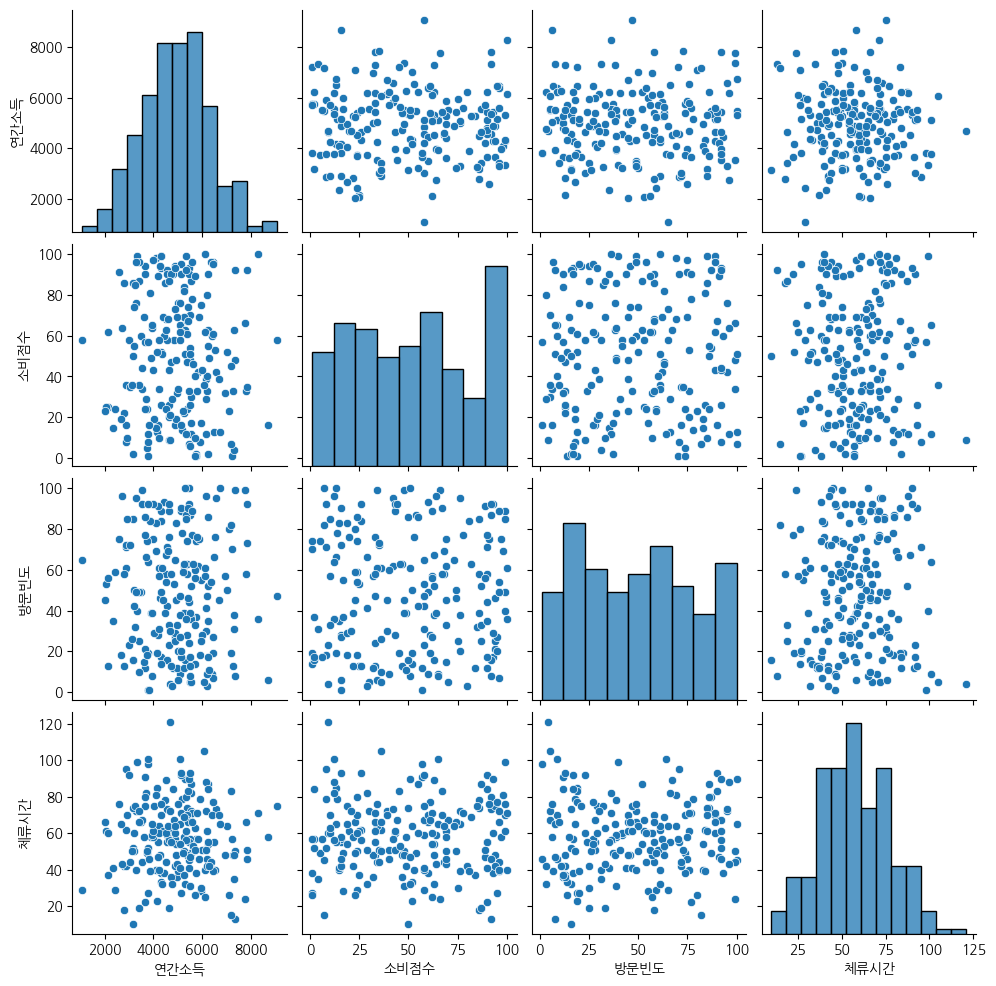

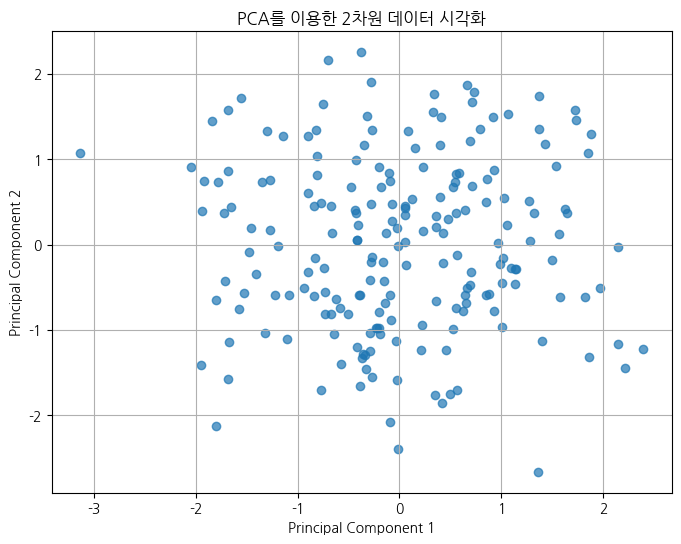

In [2]:
# 1. Pairplot으로 데이터 탐색
sns.pairplot(data)
# 모든 변수 쌍을 2차원 그래프로 그려줌
# 4 * 4 = 16개 그래프 생성
plt.show()

# 2. 데이터 표준화 (Standard Scaling)
# 표준화 도구 하나 만들기
scaler = StandardScaler()
# TODO-1: data를 scaler에 맞추고(fit) 변환(transform)하여 scaled_data에 저장하세요.
# fit: 각 변수의 평균과 표준편차 계산
# transform: 계산한 값으로 데이터 변환 (평균 = 0, 표준편차 = 1)
# scaled_data는 넘파이 배열. 값의 크기가 전부 비슷해진다.
# PCA가 공정하게 변수들을 보게 만드는 단계이다.
scaled_data = scaler.fit_transform(data)

# 3. PCA 수행
# TODO-2: n_components를 2로 설정하여 PCA 모델을 초기화하세요.
# 4차원 데이터를 2차원으로 줄이겠다는 의미의 코드
pca = PCA(n_components=2)
# fit: 데이터에서 가장 중요한 방향(주성분) 찾기
# transform: 데이터를 그 방향 기준으로 새 좌표로 변환
# 결과로 pca_data.shape -> (200, 2)
  # 고객 200명, 좌표 2개 (PC1, PC2)
pca_data = pca.fit_transform(scaled_data)

# 4. PCA 결과 시각화
# PCA 결과를 DataFrame으로 변환
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
# x축: PC1, y축:PC2, 점 하나 = 고객 한 명
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.title('PCA를 이용한 2차원 데이터 시각화')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# --- 해석 ---
# Pairplot과 PCA 산점도를 비교했을 때, 어떤 차이가 있나요? 왜 PCA가 유용한가요? (주석에 직접 작성해보세요)
# pairplot은 변수 쌍마다 여러 개의 그래프가 생성되어서 데이터 전체 구조를 한눈에 파악하기 어렵다.
# 반면 pca 산점도는 여러 변수를 종합해 2차원으로 축소한 하나의 그래프로 나타나는데, 이를 통해 데이터 분포를 직관적으로 확인할 수 있어 유용하다.

In [3]:
print("PC1 기여율:", pca.explained_variance_ratio_[0])
print("PC2 기여율:", pca.explained_variance_ratio_[1])
print("누적 기여율(PC1+PC2):", pca.explained_variance_ratio_[:2].sum())

PC1 기여율: 0.2604064957192399
PC2 기여율: 0.25428317315857724
누적 기여율(PC1+PC2): 0.5146896688778171


1. 원칙적으로 정보 손실은 발생한다. 4차원에서 2차원으로 줄이면 일부 분산(정보)이 버려질 수밖에 없다. 각각 전체 데이터 분산의 26%, 25%를 설명하며 두 주성분을 합치면 총 51%의 정보를 보존하고 있다.
2. 스케일링 없이 pca를 하면 값의 범위가 큰 변수, 여기서는 연간소득의 분산이 커서 pca가 그 방향을 '가장 중요한 축'으로 판단하게 된다. 결과적으로 pc1이 거의 연간소득 축처럼 되어버리고 다른 변수(소비점수, 방문빈도, 체류시간)는 상대적으로 무시될 가능성이 크다. 즉, 고객이 종합적으로 요약되는 게 아니라 소득 위주 요약이라는 왜곡이 발생한다. (차원 축소 결과가 왜곡될 수 있다)
3. 잘 모르겠다. 잘 안 보인다. 엘보우 방법으로 k를 정량적으로 탐색해야할 것 같다. 한 2~4개 정도가 k 후보가 아닐까.

### 🤔 생각해 볼 문제:

1.  PCA를 통해 4차원 데이터가 2차원으로 축소되었습니다. 이 과정에서 정보의 손실이 발생했을까요? `pca.explained_variance_ratio_` 속성을 출력하고, PC1과 PC2가 전체 데이터 분산의 몇 %를 각각 설명하는지 확인해보세요. 두 주성분을 합치면 총 몇 %의 정보를 보존하고 있나요?
2.  만약 데이터 표준화(Scaling) 과정을 생략하고 PCA를 적용한다면 어떤 결과가 나올까요? '연간소득' 변수가 결과에 어떤 영향을 미칠지 예상해보세요.
3.  2차원으로 축소된 산점도를 보니, 데이터들이 몇 개의 덩어리(군집)로 나뉠 수 있을 것처럼 보이나요? 대략 몇 개의 그룹으로 나눌 수 있을지 예상해보세요.

---

### 📢 **[발표 과제]**

문제 1을 맡은 팀은 **데이터 전처리 및 PCA 기본 적용**의 전문가가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** '차원의 저주'를 간단한 예시로 설명하고, 왜 PCA와 같은 차원 축소가 필요한지 설명합니다. PCA 전 데이터 스케일링의 중요성을 강조하세요.
2.  **코드 리뷰:** `StandardScaler`와 `PCA`를 사용하는 과정을 단계별로 설명합니다. Pairplot과 PCA 산점도 결과를 비교하며, PCA가 어떻게 복잡한 데이터를 한눈에 파악하기 쉽게 만드는지 보여줍니다.
3.  **'생각해 볼 문제' 토의:** 위 3가지 질문에 대한 팀의 답변을 공유합니다. 특히 `explained_variance_ratio_`를 해석하는 방법을 통해, PCA가 '정보 손실'과 '데이터 요약' 사이의 트레이드오프 관계에 있음을 설명해 보세요.


1. 차원의 저주란 변수가 많아질수록 데이터를 이해하고 분석하기가 오히려 더 어려워지는 현상을 일컫는다. 차원이 높아질수록 데이터가 희석되고, 패턴 파악이 어려워지며, 더 많은 데이터가 필요해진다.
- pca는 여러 변수를 한 번에 고려해서, 데이터를 가장 잘 설명하는 핵심 축으로 요약해주는 기법이다. 네 개의 변수를 그대로 보면 직관적이지가 않은데, pca를 사용하면 중요한 정보는 최대한 유지하면서 차원을 줄여 시각화와 분석을 쉽게 할 수 있다.
- pca는 분산이 큰 변수를 더 중요하게 보기 때문에 변수 간 스케일 차이를 맞추는 것이 필수적이다. 연간소득은 값의 범위가 큰데 소비점수, 방문빈도는 값 범위가 작다. 스케일링 없이 pca를 하면 연간소득 하나가 분석을 지배하는 문제가 발생한다. 그래서 standardscaler로 평균 0, 표준편차 1로 맞춘 후에 pca를 적용하는 것이다.
3. pca는 차원을 축소하는 과정에서 일부 정보 손실이 발생하지만, explained_variance_ratio_를 통해 확인할 수 있듯이 주성분들이 전체 데이터 분산의 51%를 설명한다. 정보 손실을 최소화하면서 데이터를 효과적으로 요약하는, trade-off 관계를 갖는 기법이다.

## 문제 2 (난이도: 중): 주성분 의미 해석하기

> **🎯 목표:** PCA로 생성된 주성분(PC1, PC2)이 원래 변수들과 어떤 관계를 갖는지 분석하여, 각 주성분에 의미를 부여합니다.


### 💡 핵심 개념:

**주성분 부하량(Principal Component Loadings)**은 원래 변수와 주성분 간의 상관계수를 나타냅니다. 특정 변수의 부하량 절댓값이 크다면, 그 변수가 해당 주성분을 형성하는 데 중요한 역할을 한다는 의미입니다. `pca.components_` 속성을 통해 이 부하량을 확인할 수 있습니다. 이를 통해 우리는 'PC1은 소득과 관련된 축', 'PC2는 쇼핑 스타일과 관련된 축'과 같이 주성분의 의미를 해석할 수 있습니다.


### 📌 수행 과제:

1.  `pca.components_` 속성을 확인하여 주성분 부하량을 담은 데이터프레임을 생성합니다. (index는 'PC1', 'PC2', columns는 원래 변수명)
2.  `seaborn`의 `heatmap`을 이용해 부하량을 시각화하여 어떤 변수가 각 주성분에 큰 영향을 미치는지 한눈에 파악합니다.
3.  부하량 값을 바탕으로 PC1과 PC2가 각각 어떤 고객 특성을 대표하는지 해석해봅니다.


주성분 부하량:
           PC1       PC2
연간소득 -0.351970 -0.248209
소비점수 -0.062222  0.859043
방문빈도  0.629213  0.305294
체류시간  0.690172 -0.327463


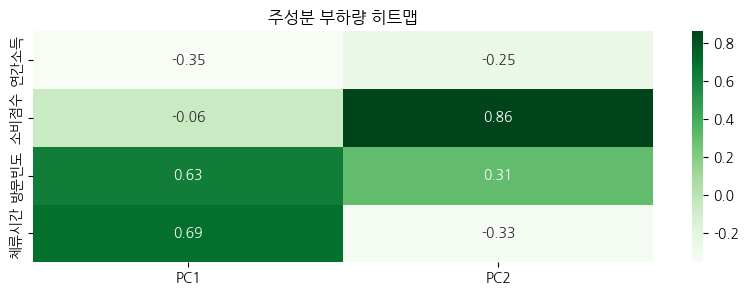

In [4]:
# 1. 주성분 부하량(Loadings) 확인
# TODO-1: pca.components_와 data.columns를 사용하여 부하량 데이터프레임(loadings_df)을 만드세요.

# loadings_df = pd.DataFrame(
#     data=pca.components_,
#     columns=data.columns,
#     index=['PC1', 'PC2']
# )

loadings_df = pd.DataFrame(
    data=pca.components_.T,
    columns=['PC1', 'PC2'],
    # 행 이름 = 원래 변수 이름
    index=data.columns
)
# pca.components_는 pca가 학습한 주성분의 계수이다. shape는 (2, 4)인데 행은 pc1, pc2이고 열은 원래 변수들이다.
# .T (전치) => shpe: (4, 5)로 바뀐다. 행은 원래 변수로, 열은 주성분으로. 변수 기준으로 주성분을 비교하게 되는 것이다.

print("주성분 부하량:")
print(loadings_df)

# 2. 히트맵으로 부하량 시각화
plt.figure(figsize=(10, 3))
sns.heatmap(loadings_df, annot=True, cmap='Greens', fmt='.2f')
plt.title('주성분 부하량 히트맵')
plt.show()

# 3. 주성분 해석 (아래 주석에 직접 작성해 보세요)
# PC1의 부하량을 보면, 어떤 변수들의 값이 양수/음수로 높은가요? PC1이 높다는 것은 무엇을 의미할까요?
# PC1 의미 해석:
# PC2의 부하량을 보면, 어떤 변수들의 값이 양수/음수로 높은가요? PC2가 높다는 것은 무엇을 의미할까요?
# PC2 의미 해석:

# pc1의 부하량을 보면 방문빈도와 체류시간의 값이 양수로 크게 나타난다.
# 따라서 pc1이 높다는 것은 고객이 자주 방문하고 오래 머무르는, 즉 전반적인 이용(활동) 강도가 높은 고객임을 의미.

# pc2의 부하량을 보면 소비점수가 양수로 매우 크게 나타난다.
# 따라서 pc2가 높다는 것은 소비 성향이 높은 고객, 즉 쇼핑몰에서 지출 수준이 높은 고객임을 의미한다.

1. 자주 오고 많이 쓰는 핵심 고객이 위치할 것이다.
2. pc1에서 부호가 서로 다르다. 두 변수가 같은 방향으로 움직이지 않는다는 뜻이다. 동일한 방향으로 주성분에 기여하지 않으며, 데이터 상에서 반드시 함께 증가하거나 감소하는 관계는 아닐 수 있음을 시사한다.
3. 예를 들어 소득 대비 소비 성향의 차이 뭐 이런 거... 특정 고객의 특이한 이용 패턴과 같은 추가적인 특성을 반영할 수 있을 것으로 기대된다.

### 🤔 생각해 볼 문제:

1.  문제 1에서 그린 PCA 산점도에서 x축(PC1)의 오른쪽으로 갈수록, y축(PC2)의 위쪽으로 갈수록 어떤 특성을 가진 고객들이 위치할 것이라고 예상할 수 있나요? 여러분이 해석한 주성분의 의미와 연결지어 설명해보세요.
2.  '연간소득'과 '체류시간' 변수는 PC1에 미치는 영향(부하량의 부호)이 서로 비슷했나요, 달랐나요? 이는 두 변수 간에 어떤 관계가 있음을 시사할까요?
3.  만약 새로운 주성분 PC3를 추가로 분석한다면, PC3는 PC1이나 PC2가 설명하지 못한 데이터의 어떤 또 다른 특성을 잡아낼 것이라고 기대할 수 있을까요?

---

### 📢 **[발표 과제]**

문제 2를 맡은 팀은 **주성분 해석**의 전문가가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** 주성분 부하량(Loadings)이 무엇인지, 그리고 이 값이 왜 주성분의 '정체'를 파악하는 데 핵심적인지 설명합니다.
2.  **코드 리뷰 및 결과 해석:** `pca.components_`를 데이터프레임과 히트맵으로 시각화하는 과정을 보여줍니다. 히트맵의 색상과 숫자를 보며 PC1과 PC2가 각각 어떤 원래 변수들과 강하게 연관되어 있는지, 그래서 각 축에 어떤 의미(예: '경제력 축', '쇼핑 열정 축')를 부여할 수 있는지 논리적으로 설명합니다.
3.  **'생각해 볼 문제' 토의:** 위 3가지 질문에 대한 팀의 답변을 발표합니다. 특히 PCA 산점도의 각 사분면에 위치할 고객들의 페르소나를 추측해보며, 주성분 해석이 어떻게 데이터에 대한 깊이 있는 이해로 이어지는지 보여주세요.


1. 주성분 부하량(loadings)은 원래의 각 변수가 주성분을 구성하는 데 얼마나 기여했는지를 나타내는 값이다. pca로 만들어진 pc1, pc2는 원래 변수들의 선형 결합니다. 부하량은 이 변수가 이 주성분에 얼마나 중요한가를 수치로 보여준다. 그래서 주성분의 '정체성'을 파악하는 핵심 근거가 되는 것이다.
2. pca_components_를 데이터프레임으로 변환해서 변수별 부하량을 표 형태로 확인하고, 이를 히트맵으로 시각화하여 어떤 변수가 각 주성분에 강하게 연관되어 있는지를 직관적으로 확인한다. 색이 진할수록 해당 변수가 주성분에 더 크게 기여했다는 것을 알 수 있으며 절댓값이 클수록 해석 시 중요한 변수가 된다.
3. pca 산점도의 각 사분면에 위치할 고객들의 페르소나
- 우측 상단: 자주 방문하고 오래 머무르며 소비도 많은 핵심 vip 고객
- 좌측 상단: 방문은 자주 하지 않지만 한 번 올 때 많이 소비하는 고가 소비형 고객
- 좌측 하단: 방문 적고 소비 적은 이탈 위험 고객
- 우측 하단: 자주 방문하고 오래 머무르지만 소비는 상대적으로 적은 잠재 고객, 업셀링 대상

## 문제 3 (난이도: 상): K-평균 군집분석으로 고객 그룹 찾기

> **🎯 목표:** K-평균 군집분석을 PCA로 차원 축소된 데이터에 적용하여 고객들을 자동으로 그룹화하고, 엘보우 방법을 이용해 최적의 군집 개수(k)를 결정합니다.


### 💡 핵심 개념:

K-평균 알고리즘을 사용하려면 '몇 개의 군집으로 나눌지(k)'를 미리 정해야 합니다. **엘보우 방법(Elbow Method)**은 k를 1부터 점차 늘려가며 각 k에 대한 군집 결과를 평가하는 방법입니다. 평가 지표로는 군집 내 데이터들이 중심에 얼마나 잘 뭉쳐있는지를 나타내는 **이너셔(Inertia)** 값을 사용합니다. k가 증가할수록 이너셔는 계속 감소하는데, 이 감소율이 급격히 완만해지는 지점(그래프 모양이 팔꿈치처럼 꺾이는 부분)을 최적의 k로 선택합니다.


### 📌 수행 과제:

1.  k를 1부터 10까지 변화시키면서 K-평균 군집분석을 반복 수행하고, 각 k에 대한 이너셔(`kmeans.inertia_`) 값을 리스트에 저장합니다.
2.  저장된 이너셔 값을 꺾은선 그래프로 시각화하여 '팔꿈치'에 해당하는 최적의 k를 찾습니다.
3.  찾아낸 최적의 k를 사용하여 K-평균 모델을 다시 학습시키고, 각 데이터 포인트에 대한 군집 레이블을 얻습니다.
4.  PCA 산점도에 군집 레이블에 따라 다른 색상을 적용하여 군집화 결과를 시각화합니다.


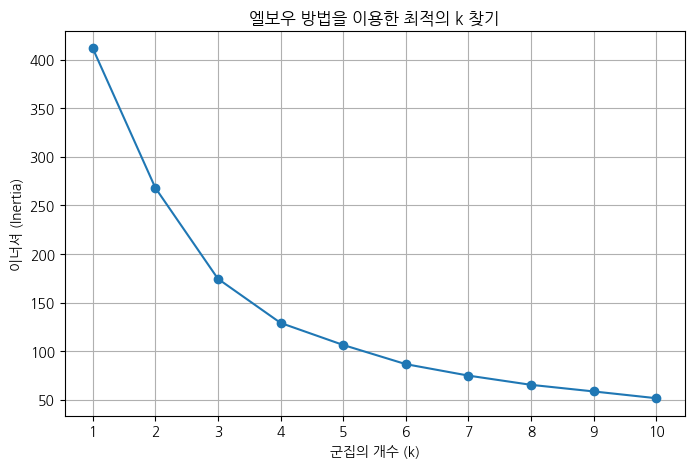

In [5]:
# 1. 엘보우 방법을 위한 이너셔(Inertia) 계산
# 이너셔 값을 차곡차곡 담을 리스트
inertia_list = []
# k를 1부터 10까지 시험해 보겠다는 뜻
k_range = range(1, 11)

# k를 바꿔가며 k-means 반복 실행
for k in k_range:
    # TODO-1: n_clusters를 k로, random_state를 42로 설정하여 KMeans 모델을 초기화하세요.
    # n_clusters=k  지금 이 반복에서 사용할 군집 개수
    # random_state=42 실행할 때마다 결과가 같도록 고정
    # n_init=10 초기 중심을 10번 시도해서 가장 좋은 결과 선택
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    # pca 데이터로 k-means 학습
    kmeans.fit(pca_data)
    # TODO-2: 학습된 kmeans 모델의 inertia_ 속성을 inertia_list에 추가하세요.
    # kmeans.inertia_ 현재 k에서의 이너셔 값 (군집 내부가 얼마나 잘 뭉쳐 있는지 점수)
    inertia_list.append(kmeans.inertia_)

# 2. 엘보우 그래프 시각화
plt.figure(figsize=(8, 5))

# x축:k_range(군집 개수 k), y축:inertia_list (각 k에서의 이너셔), marker='o'
plt.plot(k_range, inertia_list, marker='o')
plt.title('엘보우 방법을 이용한 최적의 k 찾기')
plt.xlabel('군집의 개수 (k)')
plt.ylabel('이너셔 (Inertia)')

# x축 눈금을 1~10으로 정확히 표시
# k가 몇일 때 꺾였는지 보기 쉽게 하는 것
plt.xticks(k_range)
plt.grid(True)
plt.show()

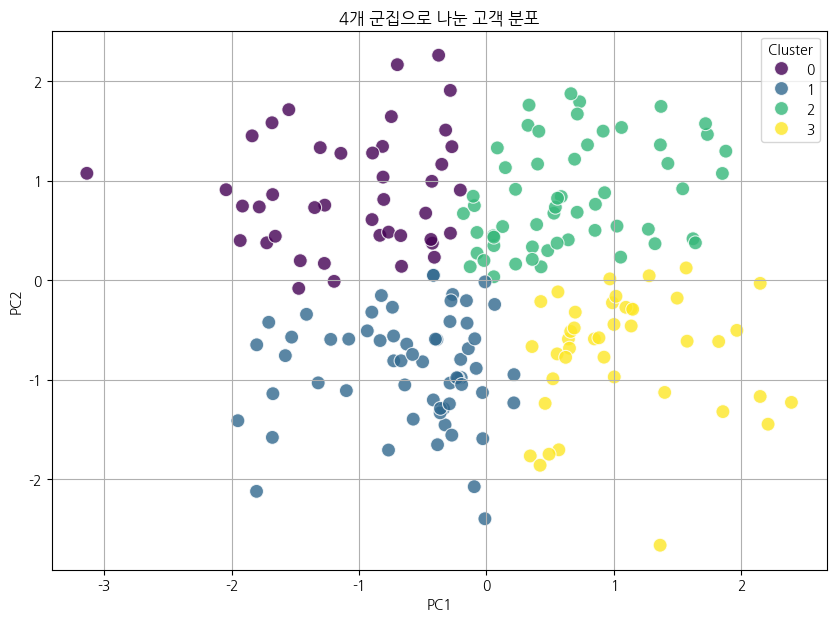

In [6]:

# 3. 최적의 k로 K-Means 다시 실행
# TODO-3: 위 그래프를 보고 최적의 k값을 결정하여 optimal_k 변수에 할당하세요.
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(pca_data)

# 4. 군집화 결과 시각화
pca_df['cluster'] = cluster_labels
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=100, alpha=0.8)
plt.title(f'{optimal_k}개 군집으로 나눈 고객 분포')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

1. k가 증가할수록 군집 내 응집도는 향상되지만, 어느 시점 이후부터는 k를 더 늘려도 이너셔 감소 폭이 크지 않다. 엘보우 지점은 군집 품질 향상과 모델 복잡도 증가 사이의 균형이 가장 잘 맞는 지점이기 때문에 최적의 k로 선택된다.
2. pca를 적용한 데이터는 핵심적인 변동만 남기고 중복되거나 중요도가 낮은 정보를 제거한 상태이기 때문에 군집분석 시 계산 효율이 높아지고 노이즈의 영향을 줄일 수 있다. 또한 2차원 공간에서 군집 결과를 시각화할 수 있어 해석과 설명이 용이하다.
- 원본 데이터(4차원)에 바로 적용했다면 변수 스케일 차이 등 때문에 군집 경계가 더 불안정해질 수 있으며 시각적으로 설명하기 어려웠을 것이다.
3. 군집 결과를 보면 전반적으로는 데이터가 몇 개의 그룹으로 나뉘는 경향이 보이지만, 일부 데이터 포인트는 경계 부근에 위치하여 군집 간 구분이 모호하다. 이런 점들이 생기는 이유는 pca 산점도에서 중심부가 아닌 경계 영역에 위치하기 때문이다. 여러 군집의 특성을 동시에 일부씩 가지는데 k-means는 무조건 가장 가까운 중심에 할당한다.(고객의 성향이 명확히 한 그룹에 속하지 않는 경우)

### 🤔 생각해 볼 문제:

1.  엘보우 그래프에서 왜 '팔꿈치' 지점이 최적의 k가 되는 것일까요? k를 그보다 더 크게 설정하면 어떤 장단점이 있을까요?
2.  군집분석을 원본 데이터(4차원)가 아닌 PCA 데이터(2차원)에 적용했습니다. 이렇게 하는 것의 장점은 무엇일까요? 만약 원본 데이터에 직접 K-평균을 적용했다면 결과가 어떻게 달라졌을지 예상해보세요.
3.  시각화된 군집 결과를 보면, 군집들이 잘 나뉘었다고 생각하나요? 경계가 모호한 데이터 포인트들은 왜 그렇게 분류되었을지, PCA 산점도와 연관지어 생각해보세요.

---

### 📢 **[발표 과제]**

문제 3을 맡은 팀은 **K-평균 군집분석**의 전문가가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** K-평균 알고리즘의 동작 원리를 간단한 그림이나 비유로 설명합니다. '최적의 k'를 찾는 것이 왜 중요한 문제인지, 그리고 엘보우 방법이 어떻게 그 해답을 주는지 이너셔(Inertia) 개념과 함께 설명하세요.
2.  **코드 리뷰:** 엘보우 그래프를 그리기 위한 for문 코드와, 최적의 k를 결정한 후 군집 결과를 시각화하는 과정을 단계별로 설명합니다.
3.  **'생각해 볼 문제' 토의:** 위 3가지 질문에 대한 팀의 답변을 발표합니다. 특히 PCA 데이터에 군집분석을 적용하는 이유(계산 효율성, 노이즈 감소, 시각화 용이성 등)를 명확히 설명하고, 이것이 분석의 질을 어떻게 높이는지 청중을 설득해 보세요.


1. k-평균 알고리즘은 데이터를 k개의 중심점 기준으로 나누고, 각 데이터가 가장 가까운 중심에 속하도록 반복적으로 조정하는 군집 알고리즘이다. k가 너무 작으면 서로 다른 유형이 한 그룹에 섞일 위험이 있고 k가 너무 크면 불필요하게 세분화되어 해석이 어렵게 된다. 따라서 적절한 균형점이 필요하다. k를 증가시키면 군집의 응집도는 좋아지지만 어느 순간부터는 k를 더 늘려도 이너셔 감소 폭이 크지 않다. 즉, 초반에는 k 증가의 '편익'이 크지만 후반에는 '비용'만 늘고 얻는 이득은 작아진다. 따라서 편익 대비 비용 관점에서 가장 효율적이 지점, 즉 이너셔 감소가 급격히 완만해지는 엘보우 지점을 최적의 k로 선택한다.
3. pca 데이터에 군집분석을 적용하는 이유
- 계산 효율성 측면 - 차원이 줄어들면 계산이 훨씬 빨라지고 안정적이다
  - 원래 데이터는 변수가 4개이고 pca 후 데이터는 주성분 2개이다
  - k-means는 거리 계산을 반복적으로 수행하는 알고리즘이기 때문에 차원이 낮을수록 계산량이 크게 감소
- 노이즈 감소 측면
  - 원래 변수들에는 중복 정보, 군집과 큰 관련 없는 변동(노이즈)이 섞여 있다.
  - pca는 분산이 작은 방향(덜 중요한 정보)을 버리고 핵심 패턴만 남긴다. 그래서 군집이 더 깔끔해진다.
- 시각화 용이성 측면
  - pairplot은 그래프가 16개인데 pca 산점도는 그래프 1개
  - 군집 결과를 한눈에 설명 가능하다

## 문제 4 (난이도: 중): 고객 세그먼트 분석 및 전략 수립

> **🎯 목표:** 군집분석으로 얻은 그룹별 특성을 원본 데이터와 비교하여 분석하고, 각 그룹에 대한 페르소나를 정의하여 실제 비즈니스에 적용할 마케팅 아이디어를 도출합니다.


### 💡 핵심 개념:

분석의 최종 목표는 '인사이트 발견'과 '액션 제안'입니다. 군집분석으로 얻은 레이블(0, 1, 2...)은 그 자체로는 의미가 없습니다. 이 레이블을 원본 데이터프레임에 다시 붙인 후, 각 그룹이 원본 변수(소득, 소비점수 등)에서 어떤 평균적인 특징을 보이는지 분석해야 비로소 각 그룹의 정체를 파악하고, 'VIP 고객', '잠재 고객', '이탈 위험 고객' 등과 같은 의미 있는 이름을 붙여줄 수 있습니다.


### 📌 수행 과제:

1.  원본 `data` 데이터프레임에 군집 레이블(`cluster_labels`)을 새로운 컬럼으로 추가합니다.
2.  `groupby('cluster')`와 `.mean()`을 사용하여 각 군집별로 4개 원본 변수의 평균값을 계산합니다.
3.  계산된 평균값을 보고 각 군집의 특징을 해석하고, 각 군집에 어울리는 이름(페르소나)을 붙여봅니다. (예: '알뜰 쇼핑족', '쇼핑 중독 VIP' 등)
4.  각 고객 그룹의 특성에 맞는 마케팅 전략을 아이디어 차원에서 제안해봅니다.


In [7]:
# 1. 원본 데이터에 군집 레이블 추가
# TODO-1: 원본 데이터프레임 'data'에 'cluster'라는 새로운 컬럼을 만들고, cluster_labels 값을 할당하세요.
data['cluster'] = cluster_labels

# 2. 군집별 특성 분석
# TODO-2: 'cluster'로 그룹화(groupby)한 뒤, 평균(mean)을 계산하여 cluster_summary에 저장하세요.
cluster_summary = data.groupby('cluster').mean()

print("군집별 평균 특성:")
print(cluster_summary)

# Cluster 0: 소득은 높은 편이고 소비점수는 매우 높지만, 방문빈도와 체류시간이 낮은 편
#   - 페르소나: "큰손·목적구매형 고객" (한 번 올 때 많이 사는 타입)
#   - 마케팅 전략: VIP 쿠폰/프리미엄 혜택 제공, 신상품·고가 상품 개인화 추천, 재방문 유도 캠페인

# Cluster 1: 소득은 가장 높지만 소비점수와 방문빈도가 낮아 아직 구매/관여도가 낮은 고객
#   - 페르소나: "고소득·잠재 고객" (구매력은 있으나 아직 관심 낮음)
#   - 마케팅 전략: 첫 구매 쿠폰/무료배송, 웰컴 프로모션, 최근 본 상품 리마인드/리타겟팅으로 전환 유도

# Cluster 2: 방문빈도와 체류시간이 높고 소비점수도 높아 활동성과 구매가 모두 높은 핵심 고객
#   - 페르소나: "충성 VIP 고객" (자주 오고 오래 머물며 잘 소비)
#   - 마케팅 전략: VIP 등급제/포인트 적립 강화, 업셀링·크로셀링 추천, 전용 이벤트/신상품 선공개
# 업셀링 upselling - 고객이 사려는 상품보다 조금 더 비싸거나 좋은 제품을 권하는 전략
# 크로셀링 cross-selling - 고객이 사려는 상품과 관련된 다른 상품을 함께 권하는 전략

# Cluster 3: 방문빈도와 체류시간이 매우 높지만 소비점수는 낮아 탐색은 많고 구매 전환이 약한 고객
#   - 페르소나: "체류형 탐색러(전환 대상)" (구경은 많이 하지만 잘 안 삼)
#   - 마케팅 전략: 장바구니 쿠폰/타임세일로 전환 촉진, 할인·무료배송 조건 강조, 결제 장벽 낮추기(간편결제/첫 구매 혜택)


군집별 평균 특성:
                연간소득       소비점수       방문빈도       체류시간
cluster                                              
0        5308.952381  76.761905  37.380952  38.714286
1        5561.475410  27.950820  31.688525  54.278689
2        4323.714286  72.910714  64.732143  63.500000
3        4470.975610  26.878049  62.390244  75.219512


1. '같은 고객이라도 행동(방문, 체류)과 소비 성향이 다르고, 그에 따라 전략도 달라져야 한다'는 비즈니스 인사이트를 얻었다. 이번 데이터에서는 서로 다른 네 가지 유형이 명확히 나왔다. 행동, 소비 두 축으로 고객을 파악할 수 있었다. 이 분석을 하지 않았다면 모든 고객에게 동일한 마케팅을 하거나, 단일 변수 기준으로만 타겟팅하여 실제로는 동일하게 취급하면 안되는 고객들을 같은 고객군으로 분류해서 동일하게 취급하는 실수를 했을 가능성이 높다. pca, k-means를 통해 누가 전환 대상인지까지 파악할 수 있게 되어 마케팅 리소스를 효율적으로 배분할 수 있게 됐다.
2. k-means는 중심 centroid 기준으로 거리를 재기 때문에 동그란 모양의 군집을 잘 찾는다. 하지만 데이터가 길쭉하거나 구불구불하거나 밀도가 다르다면 잘못 나눌 수 있다. dbscan은 밀도 기반 군집이라 원형이 아니어도 가능하고 이상치 outlier도 따로 처리 가능하다. 계층적 군집 hierarchial clustering은 데이터를 단계적으로 합치거나 나누면서 군집 구조를 트리 형태로 보여준다.
3.
- 장점
  - 의사결정을 빠르게 할 수 있고 전략을 세그먼트별로 설계할 수 있다
- 현실 적용 한계
  - 실제 고객은 경계가 뚜렷하지 않고 연속적인 스펙트럼을 가지며, 시간에 따라 성향이 변함
  - 경계 고객(애매한 고객)은 억지로 한 군집에 들어감
  - 고객은 캠페인/시즌/상황에 따라 군집 이동 가능
  - 군집은 절대적 진리가 아니라 '편의적 요약'이다

### 🤔 생각해 볼 문제:

1.  이번 분석(PCA + K-Means)을 통해 얻은 가장 중요한 비즈니스 인사이트는 무엇이라고 생각하나요? 만약 이 분석을 하지 않았다면 어떤 점을 놓쳤을까요?
2.  K-평균 군집분석은 항상 원형의 군집을 잘 찾아내는 경향이 있습니다. 만약 데이터가 길쭉하거나 특이한 모양으로 분포해 있다면 K-평균이 적합하지 않을 수 있습니다. 이런 경우 어떤 다른 군집분석 방법을 고려해볼 수 있을까요? (힌트: `DBSCAN`, `Hierarchical Clustering`)
3.  이번 분석은 고객을 몇 개의 뚜렷한 그룹으로 나누었습니다. 하지만 실제 고객의 특성은 이렇게 칼로 자르듯 나뉘지 않을 수 있습니다. 이러한 '그룹화' 모델링의 장점과 현실 세계에 적용할 때의 잠재적 한계는 무엇일까요?

---

### 📢 **[발표 과제]**

문제 4를 맡은 팀은 **인사이트 도출 및 비즈니스 적용**의 전문가가 되어 다음 내용을 중심으로 발표를 준비하세요.

1.  **핵심 개념 설명:** 데이터 분석의 최종 목표가 '보고서 작성'이 아닌 '실질적 가치 창출'에 있음을 강조합니다. 군집 레이블을 다시 원본 데이터와 결합하여 해석하는 과정의 중요성을 설명하세요.
2.  **코드 리뷰 및 결과 해석:** `groupby().mean()` 코드의 의미를 설명하고, 출력된 요약 통계표를 어떻게 해석하여 각 군집의 특징을 잡아냈는지 상세히 보여줍니다. 각 군집에 붙인 창의적인 페르소나와 그 근거를 발표하세요.
3.  **종합 결론 및 토의:** 각 페르소나에 맞춰 제안한 마케팅 전략을 발표하며, 어떻게 데이터 분석 결과가 구체적인 비즈니스 액션으로 이어질 수 있는지 보여줍니다. '생각해 볼 문제' 토의를 통해, 이번 프로젝트 전체를 되돌아보고 데이터 기반 의사결정의 가치와 잠재적 한계에 대해 논의하며 전체 실습을 마무리하세요.


1. 레이블 0, 1, 2는 의미가 없다. 원본 변수 평균으로 해석해야 의미가 발생한다. 그게 곧 페르소나 & 전략으로 이어진다.
2. groupby().mean()은 군집별 평균(프로필)을 요약한 표이다. 이 표로 어떤 군집이 소비가 높은지, 어떤 군집이 방문/체류가 높은지, 어떤 군집이 소득이 높은지를 비교한다.
3. pca+kmeans로 고객 세그멘트를 만들었고 맞춤 전략 설계가 가능해졌다. 그러나 고객은 연속적이고 변하므로 지속적으로 업데이트가 필요하다. 또한 원형 군집 가정의 한계로 인해 dbscan/계층적 군집도 고려해볼만하다. (k-means같은 전통적 군집 알고리즘은 군집이 둥글고 비슷한 크기(원형)라고 가정한다. 즉, 각 군집의 중심에서 비슷한 거리 안에 점들이 모여 있다고 생각한다. 이러한 가정의 문제점은, 실제 데이터는 원형이 아닐 수 있다는 것과 크기가 다른 군집을 k-means가 제대로 구분하지 못한다는 점이다. dbscan(density-based spatial clustering)은 밀도 기반 군집 알고리즘이다. 점이 모여 있는 밀도를 기준으로 군집을 결정한다. 원형이 아닌 복잡한 모양도 잘 잡으며 노이즈(아웃라이어) 처리가 가능하다. 계층적 군집 hierarchical clustering은 데이터 간 거리/유사도로 트리 구조를 생성한다. 군집 수를 미리 정하지 않아도 되며 군집 모양과 크기에 제약이 없다.)